In [17]:
%pylab inline
import json
import numpy as np
import pandas as pd
import sklearn.manifold as manifold
import sklearn.cluster as cluster
import sklearn.preprocessing as preprocessing
from sklearn.feature_extraction.text import CountVectorizer
import hdbscan
import seaborn as sns
import os
import itertools
from operator import itemgetter
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [18]:
def parse_data_file(path):
    data = []
    with open(path, 'r') as fp:
        for line in fp:
            point = json.loads(line)
            text = point['text']
            data.append(text)
    return data
#typical stop words....from https://kb.yoast.com/kb/list-stop-words/
stop_list = set([ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are",\
                 "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by",\
                 "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further",\
                 "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself",\
                 "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it",\
                 "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only",\
                 "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll",\
                 "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them",\
                 "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've",\
                 "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll",\
                 "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who",\
                 "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your",\
                 "yours", "yourself", "yourselves"])

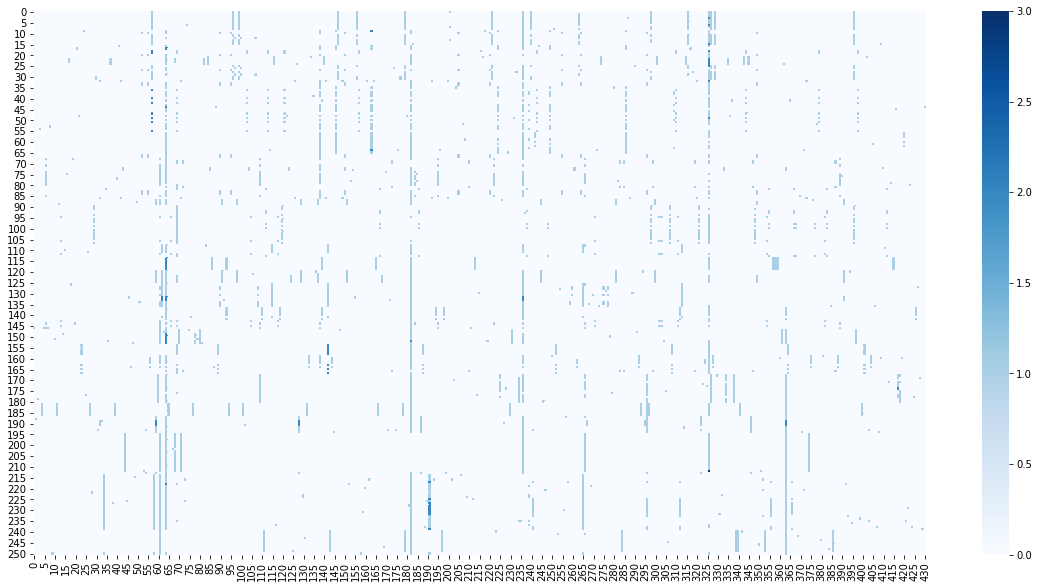

In [41]:
list_of_tweets = parse_data_file('tweets.json')
vecs = CountVectorizer(stop_words='english')
X = vecs.fit_transform(list_of_tweets).todense()
# plt.figure(figsize=(20,10))
# sns.heatmap(X,cmap='Blues')
# nrows,ncols = X.shape
# for row in range(nrows):
#     for col in range(ncols):
#         if X[row,col] > 1:
#             print(row,col,X[row,col])

Text(0.5,1,'Elbow curve')

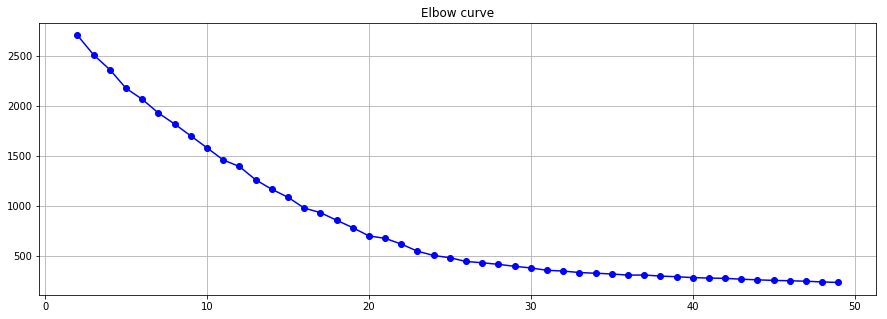

In [46]:
distorsions = []
for k in range(2, 50):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 50), distorsions, 'bo-')
plt.grid(True)
plt.title('Elbow curve')

In [54]:
# choosing elbow as 10...but this is highly subjective
k = 10
kmeans = cluster.KMeans(n_clusters=k)
clusters = kmeans.fit_predict(X)
state = [x for x in range(len(parse_data_file('tweets.json')))]
assignments = list(zip(state, clusters))
groupings = defaultdict(list)
state_g = dict()
for s, c in assignments:
    groupings[c].append(s)
    state_g[s] = c
print(groupings)

defaultdict(<class 'list'>, {3: [0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 25, 26, 28, 29, 30, 31], 4: [9, 16, 17, 21, 22, 23, 24, 32, 35, 37, 38, 39, 41, 43, 44, 45, 46, 48, 50, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 69, 70, 81, 86, 95, 106, 112, 114, 115, 116, 117, 118, 119, 143, 145, 159, 160, 161, 162, 164, 166], 9: [10, 20, 27, 33, 34, 66, 67, 83, 84], 7: [18, 19, 36, 40, 42, 47, 49, 51, 55], 0: [68, 71, 74, 75, 76, 77, 78, 79, 80, 85, 144, 146], 2: [72, 73, 87, 88, 89, 120, 121, 122, 123, 124, 125, 137, 138, 139, 140, 142, 147, 148, 149, 150, 151, 152, 153, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249], 5: [82, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 107, 113], 1: [108, 109, 110, 111, 126, 127, 128, 129, 13

In [55]:
for element in groupings:
    print(element,groupings[element])

3 [0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 25, 26, 28, 29, 30, 31]
4 [9, 16, 17, 21, 22, 23, 24, 32, 35, 37, 38, 39, 41, 43, 44, 45, 46, 48, 50, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 69, 70, 81, 86, 95, 106, 112, 114, 115, 116, 117, 118, 119, 143, 145, 159, 160, 161, 162, 164, 166]
9 [10, 20, 27, 33, 34, 66, 67, 83, 84]
7 [18, 19, 36, 40, 42, 47, 49, 51, 55]
0 [68, 71, 74, 75, 76, 77, 78, 79, 80, 85, 144, 146]
2 [72, 73, 87, 88, 89, 120, 121, 122, 123, 124, 125, 137, 138, 139, 140, 142, 147, 148, 149, 150, 151, 152, 153, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249]
5 [82, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 107, 113]
1 [108, 109, 110, 111, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 141]
8 [154